In [42]:
import pandas as pd
import numpy as np

# Creating Synthetic Data

In [43]:
# columns i want

# screen_time_hours
# sleep_duration_hours
# study_time_hours
# workout_time_hours
# stress_level -> extrenal stress
# anxiety_level ->  internal
# coffee_intake_mg
# socializing_time_hours
# water_intake_litres
# junk_food_intake

In [44]:
sample_size = 500
np.random.seed(42)

In [45]:
screen_time_hours = np.random.normal(6, 2, sample_size).clip(0, 16) # mean = 6 sd =2 values lie between 0 and 16
sleep_duration_hours = np.random.normal(7, 1.5, sample_size).clip(3, 12)
study_time_hours = np.random.normal(4, 2, sample_size).clip(0, 12)
workout_time_hours = np.random.normal(1, 0.5, sample_size).clip(0, 3)
stress_level = np.random.randint(1, 6, sample_size)  # 1-5 external stress
anxiety_level = np.random.randint(1, 6, sample_size)  # 1-5 internal anxiety
coffee_intake_mg = np.random.normal(150, 80, sample_size).clip(0, 500)
socializing_time_hours = np.random.normal(2, 1, sample_size).clip(0, 8)
water_intake_litres = np.random.normal(2, 0.5, sample_size).clip(0.5, 5)
junk_food_intake = np.random.randint(1, 6, sample_size)  # 1-5

In [46]:
# Burnout increases with stress, anxiety, screen time, junk food, coffee
# Burnout decreases with sleep, workout, socializing, water
# burnout_score = (
#     0.25*screen_time_hours +
#     -0.3*sleep_duration_hours +
#     0.2*study_time_hours +
#     -0.3*workout_time_hours +
#     5*stress_level +
#     4*anxiety_level +
#     0.01*coffee_intake_mg +
#     -0.5*socializing_time_hours +
#     -1*water_intake_litres +
#     2*junk_food_intake
# )

In [47]:
import numpy as np

# Random weights for each variable (range can be tuned)
weights = {
    "screen_time": np.random.uniform(-1, 1),
    "sleep": np.random.uniform(-1, 1),
    "study": np.random.uniform(-1, 1),
    "workout": np.random.uniform(-1, 1),
    "stress": np.random.uniform(0, 6),     # stress likely positive
    "anxiety": np.random.uniform(0, 6),    # anxiety likely positive
    "coffee": np.random.uniform(-0.05, 0.05),
    "socializing": np.random.uniform(-1, 1),
    "water": np.random.uniform(-1, 1),
    "junk_food": np.random.uniform(-2, 2)
}

# Burnout score with random feature weights
burnout_score = (
    weights["screen_time"] * screen_time_hours +
    weights["sleep"] * sleep_duration_hours +
    weights["study"] * study_time_hours +
    weights["workout"] * workout_time_hours +
    weights["stress"] * stress_level +
    weights["anxiety"] * anxiety_level +
    weights["coffee"] * coffee_intake_mg +
    weights["socializing"] * socializing_time_hours +
    weights["water"] * water_intake_litres +
    weights["junk_food"] * junk_food_intake +

    # Random non-linear terms
    np.random.uniform(-0.1, 0.1) * (screen_time_hours ** 2) +
    np.random.uniform(-0.2, 0.2) * np.sqrt(sleep_duration_hours) +
    np.random.uniform(-0.1, 0.1) * (junk_food_intake ** 2) +

    # Random interactions
    np.random.uniform(-0.5, 0.5) * stress_level * anxiety_level +
    np.random.uniform(-0.05, 0.05) * coffee_intake_mg * (7 - sleep_duration_hours) +
    np.random.uniform(-0.5, 0.5) * study_time_hours * stress_level +

    # Random noise & shocks
    np.random.normal(0, np.random.uniform(2, 6), sample_size) +
    np.random.uniform(-4, 4, sample_size)
)


In [48]:
burnout_score = ((burnout_score - burnout_score.min()) / (burnout_score.max() - burnout_score.min()) * 10).round(2)

# first min-max scale value lie between 0 and 1 then multiple by 10 so value lies between 0 and 10 then roundoff to 2 decimal places

In [49]:
burnout_score += np.random.normal(0, 1, sample_size)  # random noise

In [50]:
data = pd.DataFrame({
    "screen_time_hours": screen_time_hours,
    "sleep_duration_hours": sleep_duration_hours,
    "study_time_hours": study_time_hours,
    "workout_time_hours": workout_time_hours,
    "stress_level": stress_level,
    "anxiety_level": anxiety_level,
    "coffee_intake_mg": coffee_intake_mg,
    "socializing_time_hours": socializing_time_hours,
    "water_intake_litres": water_intake_litres,
    "junk_food_intake": junk_food_intake,
    "burnout_score": burnout_score
})

In [51]:
data.to_csv("../data/synthetic_burnout_data.csv", index=False)

In [52]:
data

,screen_time_hours,sleep_duration_hours,study_time_hours,workout_time_hours,stress_level,anxiety_level,coffee_intake_mg,socializing_time_hours,water_intake_litres,junk_food_intake,burnout_score
0,6.993428,8.389266,6.798711,1.389181,3,2,203.491989,2.942846,1.799196,3,7.039819
1,5.723471,9.864125,5.849267,0.724407,3,1,76.559299,3.110349,1.922731,2,8.571475
2,7.295377,4.902149,4.119261,0.590901,3,1,276.243001,3.083273,2.963104,3,2.105545
3,9.046060,7.844454,2.706126,0.998313,4,3,61.908777,1.433593,1.476089,1,6.878729
4,5.531693,6.024036,5.396447,0.914908,5,2,58.067609,1.420800,1.592748,5,7.904506
...,...,...,...,...,...,...,...,...,...,...,...
495,7.077820,6.578350,8.012186,1.535075,1,2,0.000000,1.260283,1.553573,4,7.648570
496,3.925508,9.696530,8.123007,0.986739,3,2,164.944351,2.865953,1.375056,5,7.762197
497,5.619323,7.961264,6.416732,0.559063,2,5,65.592759,1.717424,2.281932,2,8.802520
498,4.248763,6.143232,6.048125,0.918467,2,5,261.241806,1.828282,2.334936,5,4.608991


In [53]:
# lets remove the meaning less data generated here which is total hours should be less than equal to 24

total_hours = data["screen_time_hours"] + data["sleep_duration_hours"] + data["study_time_hours"] + data["workout_time_hours"]

data = data[total_hours <= 24].reset_index(drop = True) # resets the index for dropped rows
data

,screen_time_hours,sleep_duration_hours,study_time_hours,workout_time_hours,stress_level,anxiety_level,coffee_intake_mg,socializing_time_hours,water_intake_litres,junk_food_intake,burnout_score
0,6.993428,8.389266,6.798711,1.389181,3,2,203.491989,2.942846,1.799196,3,7.039819
1,5.723471,9.864125,5.849267,0.724407,3,1,76.559299,3.110349,1.922731,2,8.571475
2,7.295377,4.902149,4.119261,0.590901,3,1,276.243001,3.083273,2.963104,3,2.105545
3,9.046060,7.844454,2.706126,0.998313,4,3,61.908777,1.433593,1.476089,1,6.878729
4,5.531693,6.024036,5.396447,0.914908,5,2,58.067609,1.420800,1.592748,5,7.904506
...,...,...,...,...,...,...,...,...,...,...,...
476,7.077820,6.578350,8.012186,1.535075,1,2,0.000000,1.260283,1.553573,4,7.648570
477,3.925508,9.696530,8.123007,0.986739,3,2,164.944351,2.865953,1.375056,5,7.762197
478,5.619323,7.961264,6.416732,0.559063,2,5,65.592759,1.717424,2.281932,2,8.802520
479,4.248763,6.143232,6.048125,0.918467,2,5,261.241806,1.828282,2.334936,5,4.608991


# EDA

In [54]:
data.head()

,screen_time_hours,sleep_duration_hours,study_time_hours,workout_time_hours,stress_level,anxiety_level,coffee_intake_mg,socializing_time_hours,water_intake_litres,junk_food_intake,burnout_score
0,6.993428,8.389266,6.798711,1.389181,3,2,203.491989,2.942846,1.799196,3,7.039819
1,5.723471,9.864125,5.849267,0.724407,3,1,76.559299,3.110349,1.922731,2,8.571475
2,7.295377,4.902149,4.119261,0.590901,3,1,276.243001,3.083273,2.963104,3,2.105545
3,9.046060,7.844454,2.706126,0.998313,4,3,61.908777,1.433593,1.476089,1,6.878729
4,5.531693,6.024036,5.396447,0.914908,5,2,58.067609,1.420800,1.592748,5,7.904506


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   screen_time_hours       481 non-null    float64
 1   sleep_duration_hours    481 non-null    float64
 2   study_time_hours        481 non-null    float64
 3   workout_time_hours      481 non-null    float64
 4   stress_level            481 non-null    int32  
 5   anxiety_level           481 non-null    int32  
 6   coffee_intake_mg        481 non-null    float64
 7   socializing_time_hours  481 non-null    float64
 8   water_intake_litres     481 non-null    float64
 9   junk_food_intake        481 non-null    int32  
 10  burnout_score           481 non-null    float64
dtypes: float64(8), int32(3)
memory usage: 35.8 KB


In [56]:
data.describe()

,screen_time_hours,sleep_duration_hours,study_time_hours,workout_time_hours,stress_level,anxiety_level,coffee_intake_mg,socializing_time_hours,water_intake_litres,junk_food_intake,burnout_score
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,5.921085,6.979878,4.121146,1.010313,3.039501,2.875260,148.822001,1.952226,2.021494,3.018711,6.389126
std,1.907202,1.434987,1.926430,0.477144,1.427592,1.430702,75.856793,0.962485,0.493064,1.385063,1.716399
min,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.682016,1.000000,-0.157037
25%,4.563112,6.062772,2.773195,0.688675,2.000000,2.000000,94.841774,1.297252,1.691161,2.000000,5.270502
50%,5.961968,6.994596,4.119261,0.988566,3.000000,3.000000,152.810134,1.916606,2.020729,3.000000,6.463366
75%,7.190314,7.932715,5.346363,1.336287,4.000000,4.000000,200.393189,2.662117,2.346060,4.000000,7.598987
max,12.157762,10.948573,9.159419,2.596554,5.000000,5.000000,352.365160,4.750723,3.828851,5.000000,10.530026


In [57]:
# no missing values as it is synthetic


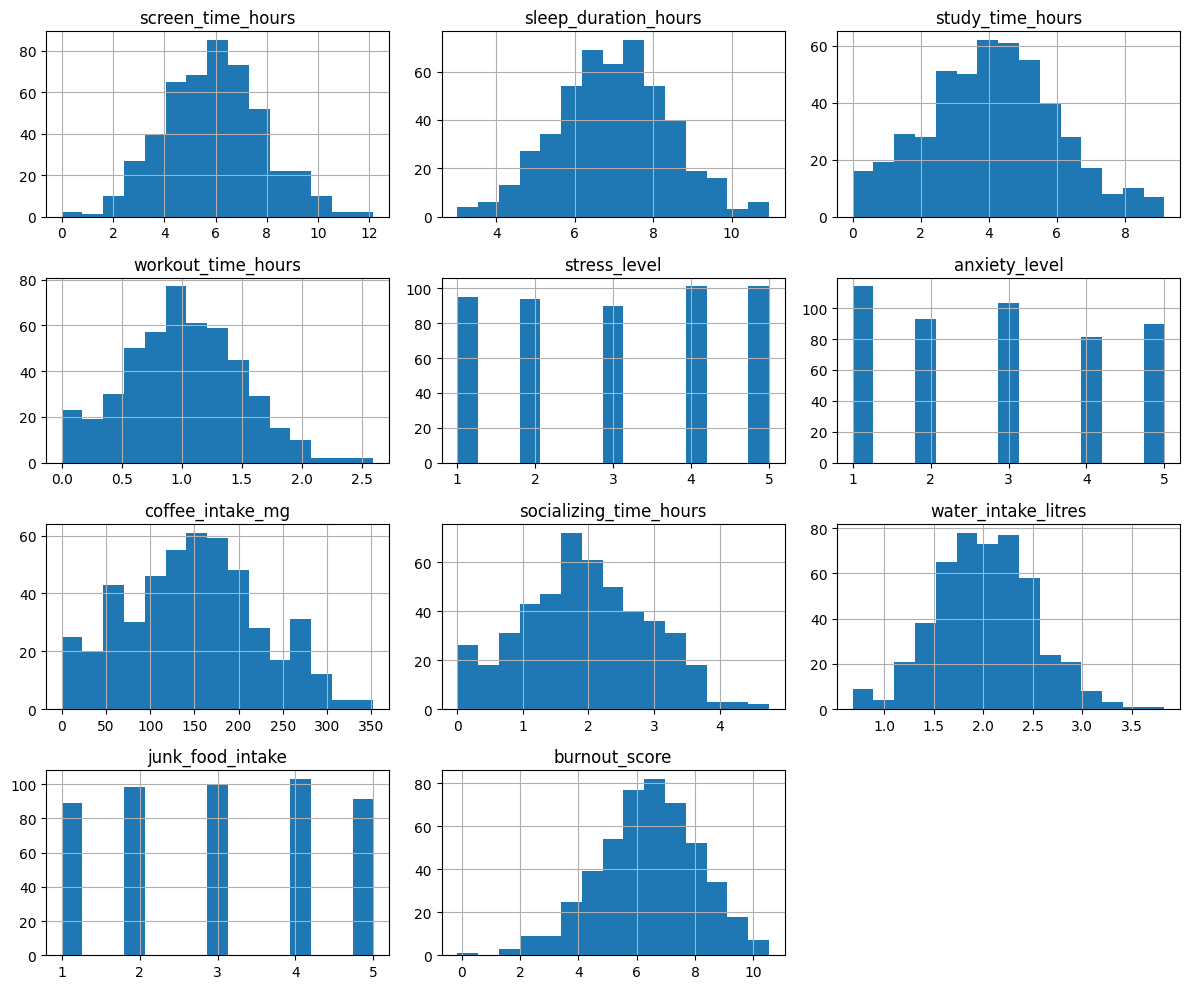

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for all features
data.hist(figsize=(12,10), bins=15)
plt.tight_layout()
plt.show()


In [59]:
# socializing is little bit right skewed rest are normally distributed

burnout_score             1.000000
sleep_duration_hours      0.510260
anxiety_level             0.406320
stress_level              0.162362
study_time_hours          0.112726
socializing_time_hours    0.084710
workout_time_hours        0.073219
junk_food_intake          0.011332
water_intake_litres       0.003030
screen_time_hours        -0.137967
coffee_intake_mg         -0.242654
Name: burnout_score, dtype: float64


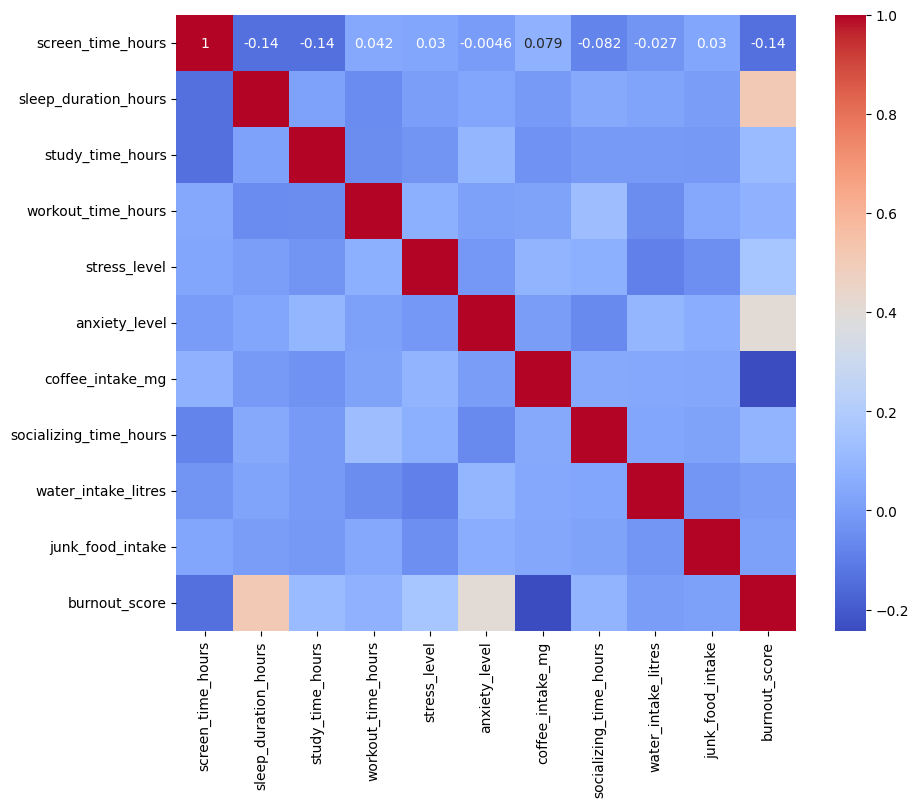

In [60]:
corr_matrix = data.corr()
print(corr_matrix["burnout_score"].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [61]:
# stress and anxiety are linked to burnout more as compare to others

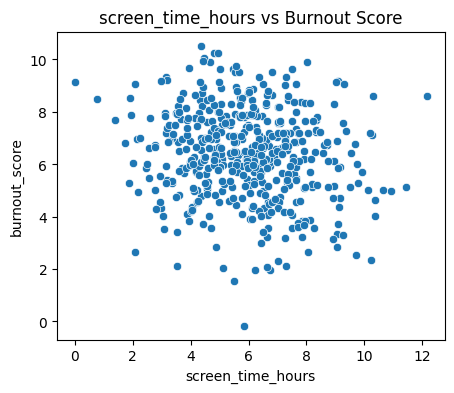

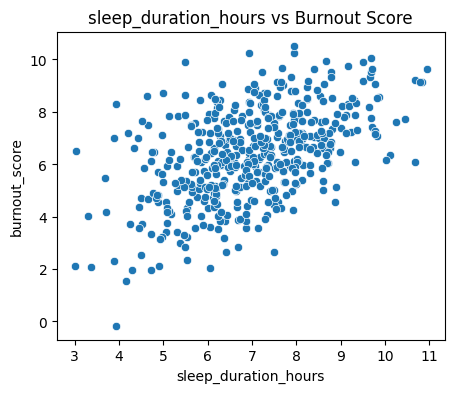

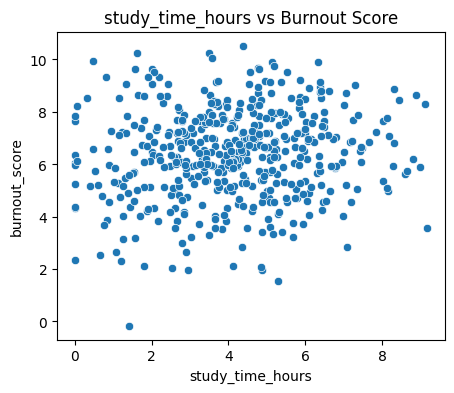

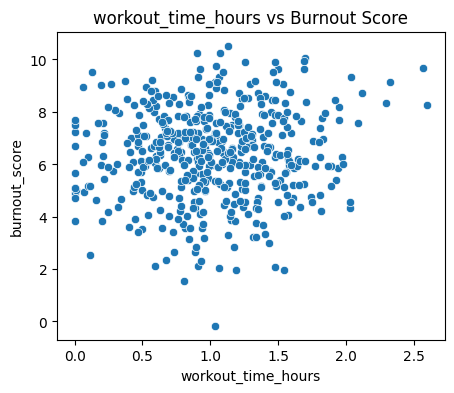

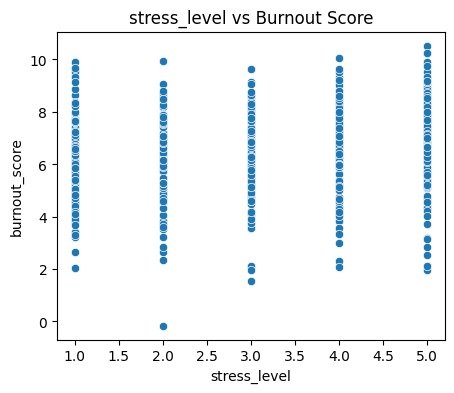

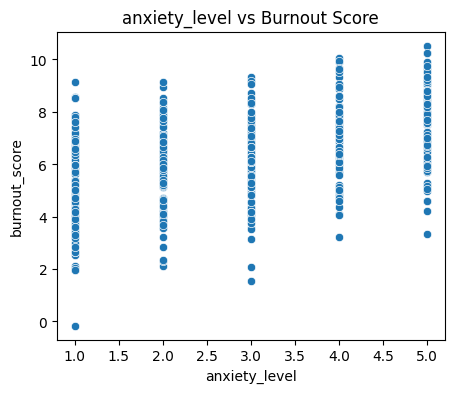

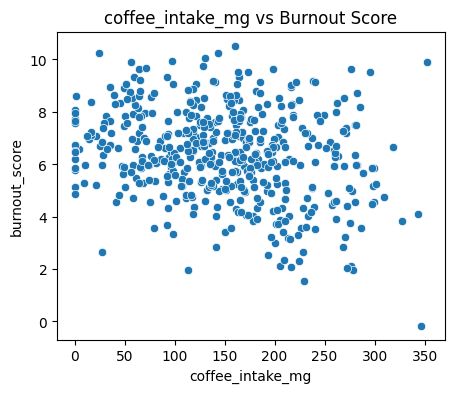

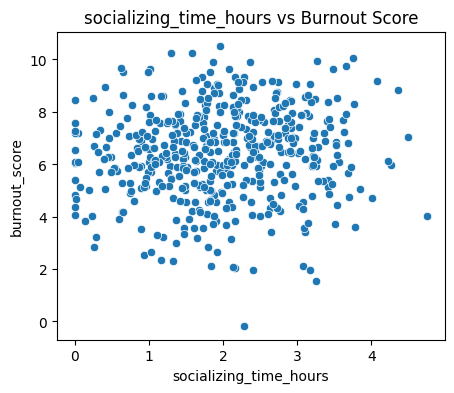

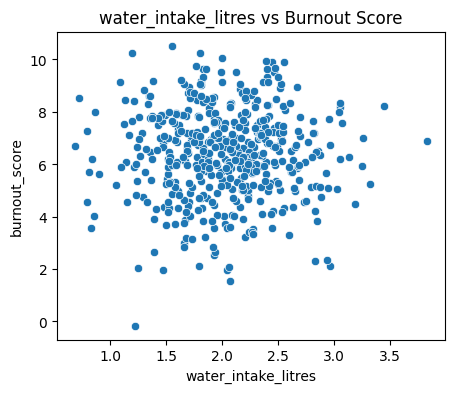

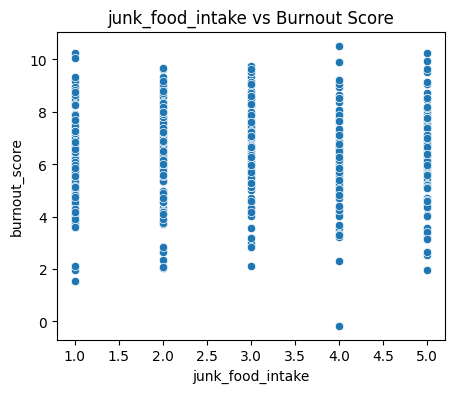

In [62]:
features = data.columns[:-1]  # exclude burnout_score

for feature in features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=data[feature], y=data["burnout_score"])
    plt.title(f"{feature} vs Burnout Score")
    plt.show()


# Model Training

In [63]:
data.head()

,screen_time_hours,sleep_duration_hours,study_time_hours,workout_time_hours,stress_level,anxiety_level,coffee_intake_mg,socializing_time_hours,water_intake_litres,junk_food_intake,burnout_score
0,6.993428,8.389266,6.798711,1.389181,3,2,203.491989,2.942846,1.799196,3,7.039819
1,5.723471,9.864125,5.849267,0.724407,3,1,76.559299,3.110349,1.922731,2,8.571475
2,7.295377,4.902149,4.119261,0.590901,3,1,276.243001,3.083273,2.963104,3,2.105545
3,9.046060,7.844454,2.706126,0.998313,4,3,61.908777,1.433593,1.476089,1,6.878729
4,5.531693,6.024036,5.396447,0.914908,5,2,58.067609,1.420800,1.592748,5,7.904506


In [64]:
X = data.iloc[:, : -1]

In [65]:
y = data.iloc[:, -1]

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = lr.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.40957745021726644
RMSE: 1.2806297424103736
MAE: 1.0319645117303111


c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Saving Model

# Save the model

# Saving model

In [71]:
import pickle

In [72]:
with open("../models/burnout_model.pkl", "wb") as f:
    pickle.dump(rf, f)